In [17]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df.head()

,Year,United States,South,West
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119


In [18]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df
unemploy_rate= rate_df.groupby(["Year"]).mean()['Unemployment Rate']
unemploy_rate_df = pd.DataFrame(unemploy_rate)
unemploy_rate_df = unemploy_rate_df.drop([1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979])
unemploy_rate_df.head()

,Unemployment Rate
Year,
1980,7.175000
1981,7.616667
1982,9.708333
1983,9.600000
1984,7.508333


In [19]:
sales_unemploy_df = pd.merge(sales_df,unemploy_rate_df, on="Year", how="outer")
sales_unemploy_df=sales_unemploy_df.rename(index=str, columns={'Unemployment Rate': 'National Unemployment Rate',
                                                               'South':'South Home Sales', 
                                                              'West': 'West Home Sales'})
sales_unemploy_df.head()

,Year,United States,South Home Sales,West Home Sales,National Unemployment Rate
0,1963,560,199,141,NaN
1,1964,565,200,129,NaN
2,1965,575,210,129,NaN
3,1966,461,166,99,NaN
4,1967,487,179,119,NaN


In [20]:
csvpath3="Resources\SouthData.csv"
south_data = pd.DataFrame(pd.read_csv(csvpath3))
south_data.head()

,Year,South
0,1980,6.26
1,1981,6.85
2,1982,8.78
3,1983,9.02
4,1984,7.06


In [21]:
add_fl_df = pd.merge(sales_unemploy_df, south_data, on="Year", how="outer")
add_fl_df = add_fl_df.rename(index=str, columns={'South': 'South Unemployment Rate'})
add_fl_df.head()

,Year,United States,South Home Sales,West Home Sales,National Unemployment Rate,South Unemployment Rate
0,1963,560,199,141,NaN,NaN
1,1964,565,200,129,NaN,NaN
2,1965,575,210,129,NaN,NaN
3,1966,461,166,99,NaN,NaN
4,1967,487,179,119,NaN,NaN


In [22]:
csvpath4 = "Resources\WestData.csv"
west_data = pd.DataFrame(pd.read_csv(csvpath4))
west_data.head()

,Year,West
0,1980,6.88
1,1981,7.42
2,1982,9.86
3,1983,9.52
4,1984,7.53


In [23]:
ca_fl_unemploy_data = pd.merge(add_fl_df, west_data, on="Year", how="outer")
ca_fl_unemploy_data = ca_fl_unemploy_data.rename(index=str, columns={'West': 'West Unemployment Rate'})
ca_fl_unemploy_data.head()

,Year,United States,South Home Sales,West Home Sales,National Unemployment Rate,South Unemployment Rate,West Unemployment Rate
0,1963,560,199,141,NaN,NaN,NaN
1,1964,565,200,129,NaN,NaN,NaN
2,1965,575,210,129,NaN,NaN,NaN
3,1966,461,166,99,NaN,NaN,NaN
4,1967,487,179,119,NaN,NaN,NaN


<IPython.core.display.Javascript object>


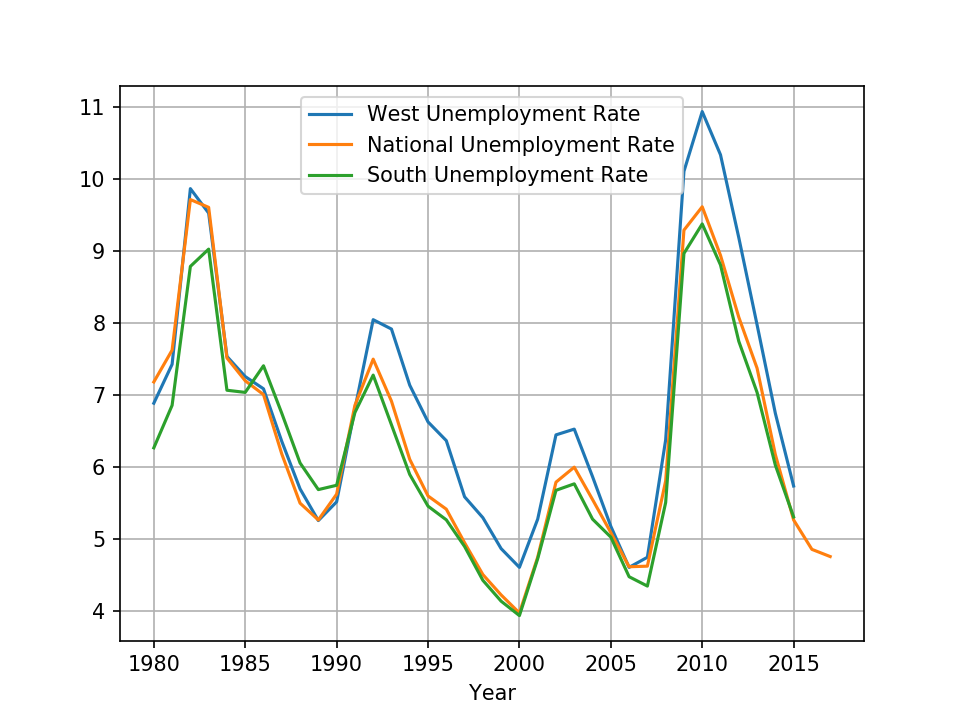

In [24]:
ca_fl_unemploy_data.plot("Year", ["West Unemployment Rate","National Unemployment Rate", "South Unemployment Rate"], kind="line")
plt.grid()


<IPython.core.display.Javascript object>


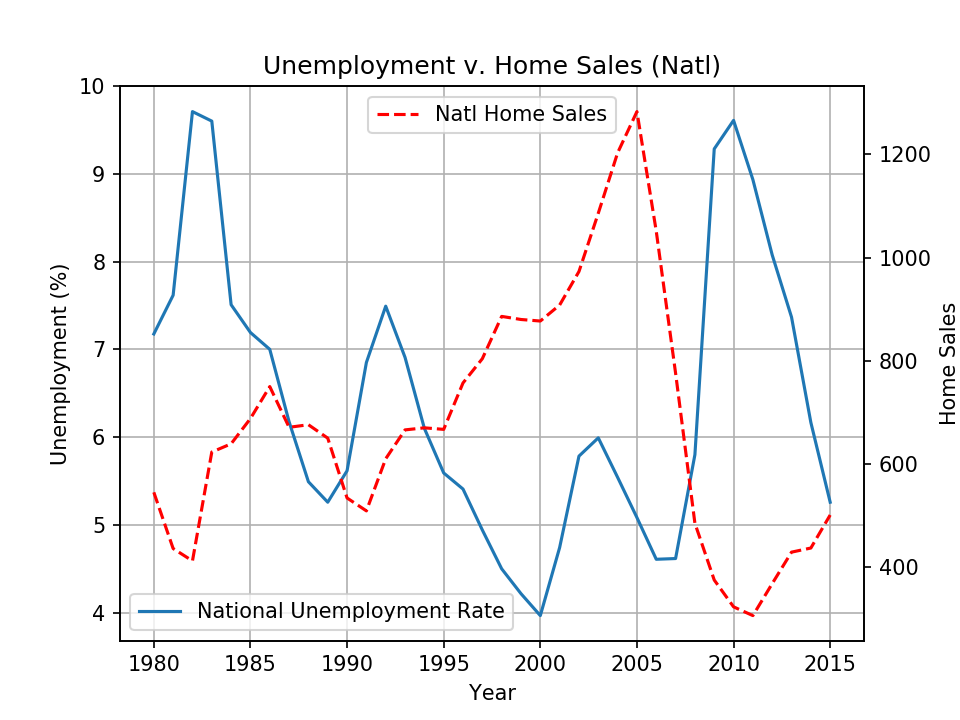

In [49]:
home_sales=[]
for sale in ca_fl_unemploy_data["United States"][17:53]:
    int_sale=int(sale)
    home_sales.append(int_sale)
fig, ax1=plt.subplots()
x=np.arange(1980,2016)
n=ca_fl_unemploy_data['National Unemployment Rate'][:53].dropna(how="all")
ax1.plot(x,n, label="National Unemployment Rate")
ax2=ax1.twinx()
ax2.plot(x,home_sales,color="r",linestyle="--", label='Natl Home Sales')
ax1.grid()
ax1.set_title('Unemployment v. Home Sales (Natl)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment (%)')
ax2.set_ylabel('Home Sales')
ax1.legend(loc="best")
ax2.legend(loc="upper center")
plt.savefig('Graph Images/Unemployment_Home_Sales.png')

<IPython.core.display.Javascript object>


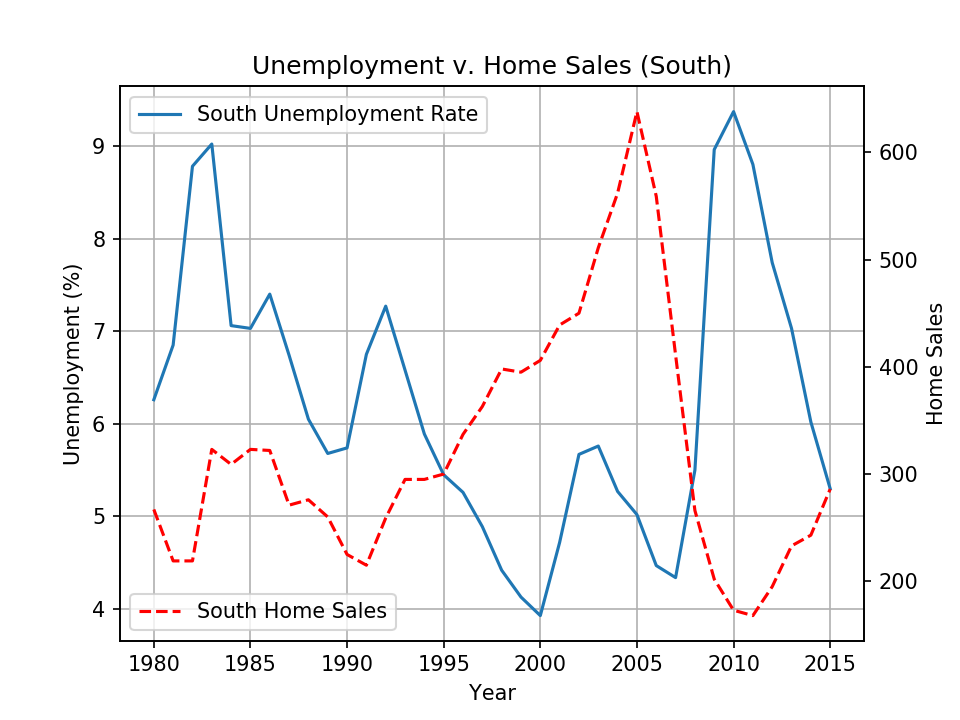

In [42]:
south_sales=[]
for sale in ca_fl_unemploy_data["South Home Sales"][17:53]:
    int_south_sale=int(sale)
    south_sales.append(int_south_sale)
fig, ax3=plt.subplots()
x=np.arange(1980,2016)
s=ca_fl_unemploy_data['South Unemployment Rate'].dropna(how="all")
ax3.plot(x,s, label="South Unemployment Rate")
ax4=ax3.twinx()
ax4.plot(x,south_sales,color="r",linestyle="--", label='South Home Sales')
ax3.grid()
ax3.set_title('Unemployment v. Home Sales (South)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Unemployment (%)')
ax4.set_ylabel('Home Sales')
ax3.legend(loc="upper left")
ax4.legend(loc="lower left")
plt.savefig('Graph Images/Unemployment_South_Sales.png')

<IPython.core.display.Javascript object>


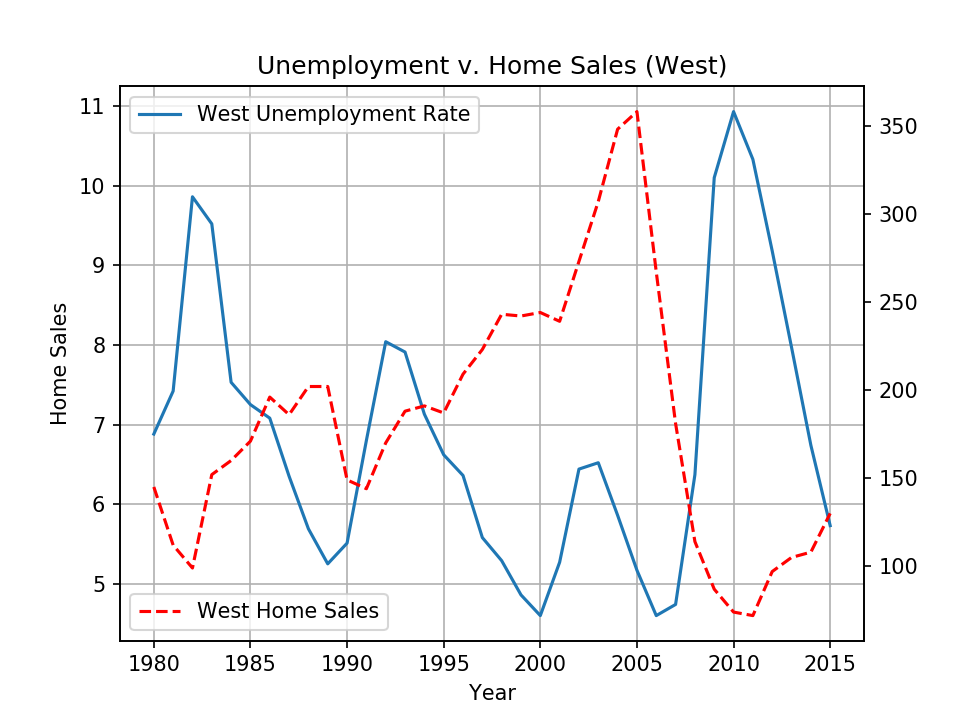

In [43]:
west_sales=[]
for sale in ca_fl_unemploy_data["West Home Sales"][17:53]:
    int_west_sale=int(sale)
    west_sales.append(int_west_sale)
fig, ax5=plt.subplots()
x=np.arange(1980,2016)
w=ca_fl_unemploy_data['West Unemployment Rate'].dropna(how="all")
ax5.plot(x,w, label="West Unemployment Rate")
ax6=ax5.twinx()
ax6.plot(x,west_sales,color="r",linestyle="--", label='West Home Sales')
ax5.grid()
ax5.set_title('Unemployment v. Home Sales (West)')
ax5.set_xlabel('Year')
ax5.set_ylabel('Unemployment (%)')
ax5.set_ylabel('Home Sales')
ax5.legend(loc="upper left")
ax6.legend(loc="lower left")
plt.savefig('Graph Images/Unemployment_West_Sales.png')